In [1]:
import numpy as np
import diplib as dip
import matplotlib.pyplot as plt
from PIL import Image

PyDIPjavaio unavailable:
libjvm.so: cannot open shared object file: No such file or directory

libjvm not found
DIPlib -- a quantitative image analysis library
Version 3.2.0 (Feb  8 2022)
For more information see https://diplib.org


<h3>Loading all the data</h3>

In [2]:
# used for names
rects = ['rect1', 'rect2', 'rect3', 'rect4']
rects_a = ['rect1b', 'rect2b', 'rect3b', 'rect4b']
rects_b = ['rect1c', 'rect2c', 'rect3c', 'rect4c'] 

In [3]:
rect_data = []  # normal images
rect_a_data = []  # noised images, set 1
rect_b_data = []  # noised images, set 2

# Load first set of data
for curr_rect in range(len(rects)):
    # Load normal images
    rect1 = dip.ImageReadTIFF(f"data/{rects[curr_rect]}.tif")
    rect_data.append(rect1)

    # Load noised set 1
    rect_a = dip.ImageReadTIFF(f"data/{rects_a[curr_rect]}.tif")
    rect_a_data.append(rect_a)

    # Load noised set 2
    rect_b = dip.ImageReadTIFF(f"data/{rects_b[curr_rect]}.tif")
    rect_b_data.append(rect_b)

<h3>Data visualization</h3>

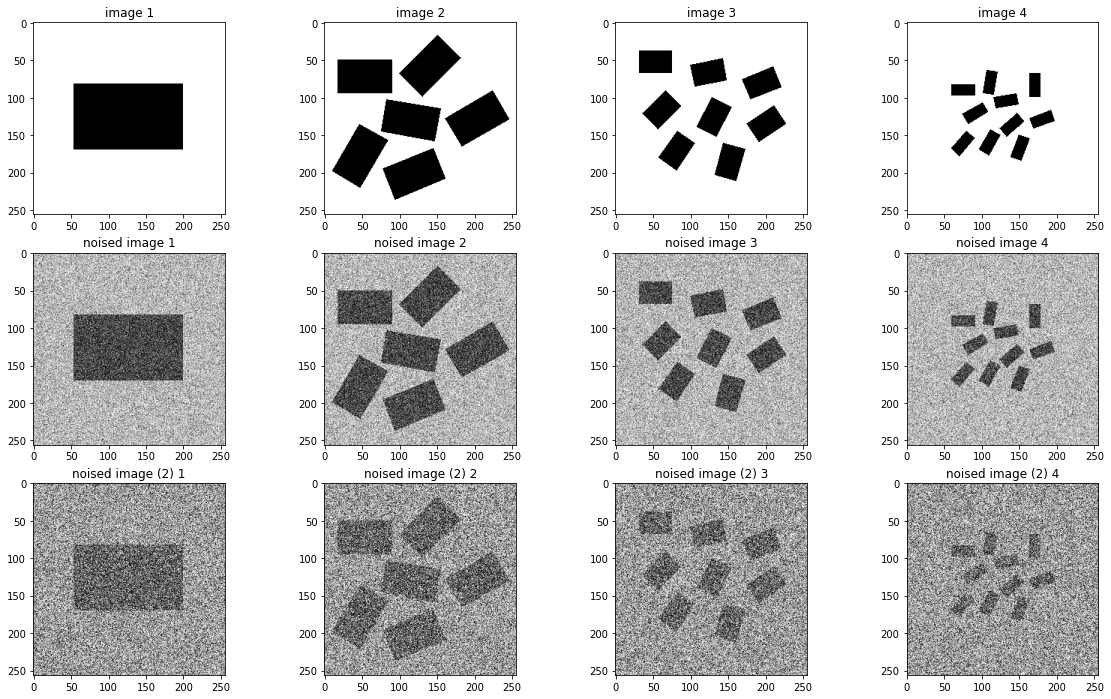

In [4]:
fig, axis = plt.subplots(3,4, figsize=(20,12))
for curr_col in range(len(rects)):
    axis[0,curr_col].imshow(rect_data[curr_col], cmap='gray')
    axis[0,curr_col].set_title(f"image {curr_col + 1}")

    axis[1,curr_col].imshow(rect_a_data[curr_col], cmap='gray')
    axis[1,curr_col].set_title(f"noised image {curr_col + 1}")

    axis[2,curr_col].imshow(rect_b_data[curr_col], cmap='gray')
    axis[2,curr_col].set_title(f"noised image (2) {curr_col + 1}")

<br/>
<h3>Part 2.1 - exercise 1 </h3>
<h4>Computing histograms of base images</h4>

Histogram of image 1


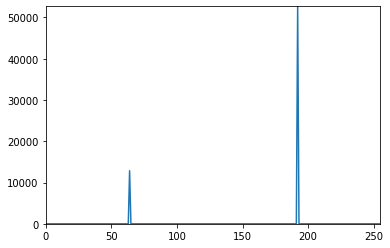

Histogram of image 2


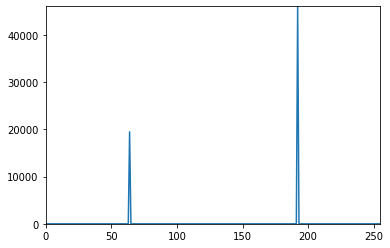

Histogram of image 3


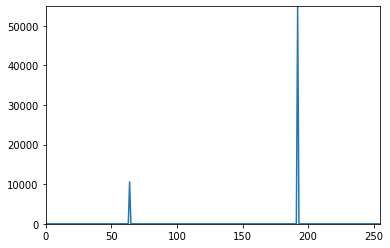

Histogram of image 4


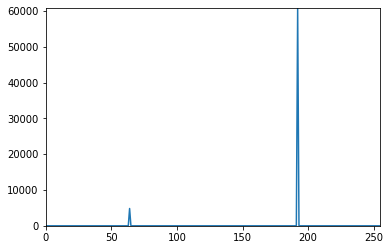

In [5]:
i = 1
for rect in rect_data:
    # create and plot histograms
    print(f"Histogram of image {i}")
    i += 1
    hist = dip.Histogram(rect)
    hist.Show()

<br/>
<h3>Part 2.1 - exercises 2 and 3</h3>
<h4>Measuring the area  and perimeter of the objects for each image</h4>

Looking at the histograms above, we notice that a good intensity value, to separate pixels, lies between 100 and 150. We will use threshold = 120 for our experiments.

In [6]:

threshold = 120

def area_and_perimeters(img, threshold):
    """ This function returns the area, perimeter and standard deviations for the input image
    """
    b = img < threshold # pixels in the threshold
    b = dip.EdgeObjectsRemove(b)
    b = dip.Label(b, minSize=30)
    m = dip.MeasurementTool.Measure(b, img, ['Perimeter', 'Size'])

    # Calculating the average and standard deviation of the objects in the figure 
    areas = []
    perimeters = []
    for i in range(1,m.NumberOfObjects()+1):
        areas.append(m["Size"][i])
        perimeters.append(m["Perimeter"][i])

    avg_perim = np.mean(perimeters)
    std_perim = np.std(perimeters)
    avg_area = np.mean(areas)
    std_area = np.std(areas)
    return avg_perim, std_perim, avg_area, std_area

In [7]:
# This is used as a simple test to check our approach below.
# As we can see the value of the area for the first image is the same, so our aproach should be correct.
np_area = rect1[rect1 < threshold]
print(f"Area of rect1.tif calculated with numpy: {len(np_area)}, should be same as below.")

Area of rect1.tif calculated with numpy: 4830, should be same as below.


In [8]:
# Printing results for exercises 2.1.1 and 2.1.2
print()
print("Statistics for area and perimeter of each image:")
print()
rects_stats = []
for curr_rect in range(len(rects)):
    perim, std_perim, area, std_area = area_and_perimeters(rect_data[curr_rect], threshold)
    rects_stats.append([perim, std_perim, area, std_area])
    print(f"{rects[curr_rect]}.tif \t| avg area: {area} \t| area std: {np.round(std_area, 3)} \t| perimeter: {np.round(perim,3)} \t| perimeter std: {np.round(std_perim, 3)}")
    print("-------------------------------------------------------------------------------------------------------------------")


Statistics for area and perimeter of each image:

rect1.tif 	| avg area: 12848.0 	| area std: 0.0 	| perimeter: 457.498 	| perimeter std: 0.0
-------------------------------------------------------------------------------------------------------------------
rect2.tif 	| avg area: 3247.5 	| area std: 28.826 	| perimeter: 233.811 	| perimeter std: 1.863
-------------------------------------------------------------------------------------------------------------------
rect3.tif 	| avg area: 1324.125 	| area std: 19.554 	| perimeter: 147.581 	| perimeter std: 1.8
-------------------------------------------------------------------------------------------------------------------
rect4.tif 	| avg area: 483.0 	| area std: 10.798 	| perimeter: 92.823 	| perimeter std: 1.255
-------------------------------------------------------------------------------------------------------------------


<br/>
<h3>Part 2.2 - exercise 4</h3>
<h4>Relative error for area</h4>

In this section we observe the relative discretization error, defined as the square root of the mean size against the coeficient of variation (CV = standard deviation/mean) 

In [9]:
# the same function as in section 2.1.2 - 2.1.3 is used
avg_areas = []
std_areas = []
avg_perimeters = []
std_perimeters = []
for curr_rect in range(len(rects)):
    avg_perim, std_perim, avg_area, std_area = area_and_perimeters(rect_data[curr_rect], threshold)
    avg_perimeters.append(avg_perim)
    std_perimeters.append(std_perim)
    avg_areas.append(avg_area)
    std_areas.append(std_area)

Text(0, 0.5, 'Coeficient of variation')

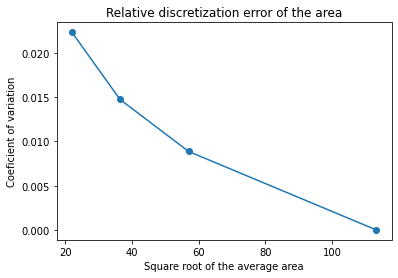

In [10]:
coef_variation = np.divide(std_areas, avg_areas)

plt.scatter(x=np.sqrt(avg_areas), y=coef_variation)
plt.plot(np.sqrt(avg_areas),coef_variation)

plt.title("Relative discretization error of the area")
plt.xlabel("Square root of the average area")
plt.ylabel("Coeficient of variation")

From the plot above we can deduce that the relative error diminishes with increasing size of the objects, as expected.

<br/>
<h3>Part 2.2 - exercise 5</h3>
<h4>Relative error for perimeter</h4>

Text(0, 0.5, 'Coeficient of variation')

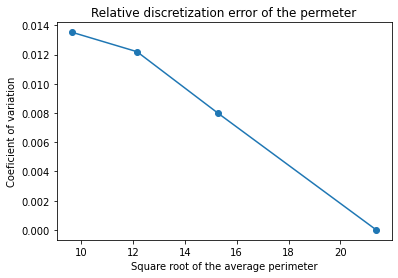

In [11]:
coef_variation = np.divide(std_perimeters, avg_perimeters)

plt.scatter(x=np.sqrt(avg_perimeters), y=coef_variation)
plt.plot(np.sqrt(avg_perimeters),coef_variation)

plt.title("Relative discretization error of the permeter")
plt.xlabel("Square root of the average perimeter")
plt.ylabel("Coeficient of variation")

<br/>
<h3>Part 2.2 - exercise 6</h3>
<h4>Differences in the outcome of the area plot and the perimeter plot.</h4>

<br/>
<h3>Part 2.3 - exercise 7</h3>
<h4>Histograms for series <b>A</b> </h4>

Histogram for noised image 1


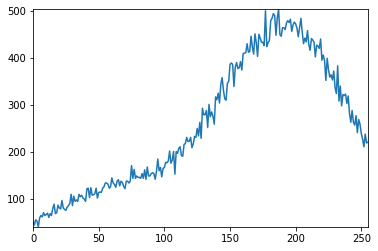

Histogram for noised image 2


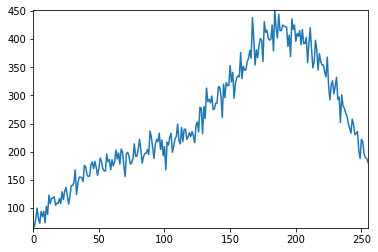

Histogram for noised image 3


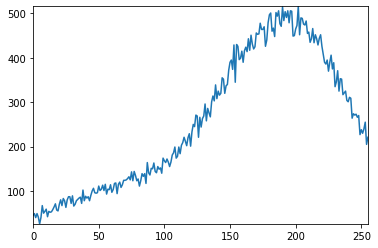

Histogram for noised image 4


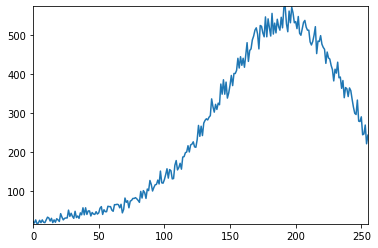

In [12]:
i=1
for rect in rect_a_data:

    # create and plot histograms
    print(f"Histogram for noised image {i}")
    i += 1
    hist = dip.Histogram(rect)
    hist.Show()


<h4>Histograms for series <b>B</b> </h4>

Histogram for rect1c


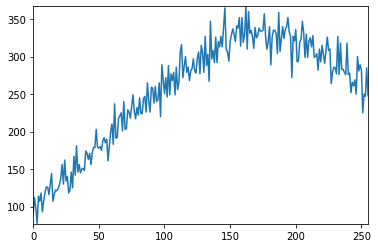

Histogram for rect2c


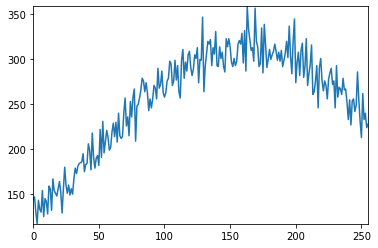

Histogram for rect3c


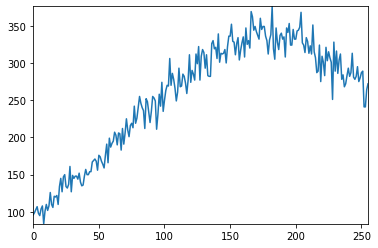

Histogram for rect4c


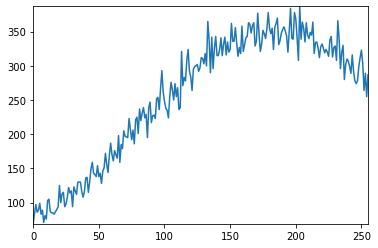

In [13]:
rects_b = ['rect1c', 'rect2c', 'rect3c', 'rect4c'] # used for names
rect_b_data = []  # keeps the dip image objects
for rect in rects_b:
    rect1_b = dip.ImageReadTIFF(f"data/{rect}.tif")
    rect_b_data.append(rect1_b)

    # create and plot histograms
    hist1_b = dip.Histogram(rect1_b)
    print(f"Histogram for {rect}")
    hist1_b.Show()

<br/>
<h3>Part 2.3 - exercise 8</h3>
<h4>Applying filters to suppress noise to series <b>A</b> and <b>B</b>  </h4>

<h4>Series A</h4>

We will first test our setup on one image to explore the different processing options and then proceed to apply our transformations to all the images

Kuwahara filter applied to noised image.


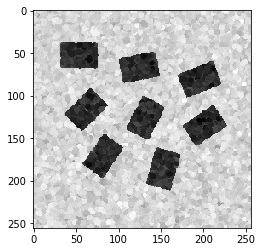

Histogram for filtered example image:


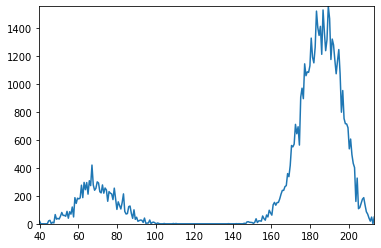

In [14]:
example = rect_a_data[2]
filtered = dip.Kuwahara(example, kernel=5, threshold=5)
print("Kuwahara filter applied to noised image.")
dip.Show(filtered)
x = np.where(filtered > 120, 255, 0).astype(int)
# create and plot histograms
filtered_hist = dip.Histogram(filtered)
print(f"Histogram for filtered example image:")
filtered_hist.Show()


From the histogram above we notice that after applying the Kuwahari filter, a good intensity threshold value lies between 120 and 140. We can exploit this to get an even better representation of the denoised image, by using a thresholding function, as done below.

Kuwahara filtered image with threshold


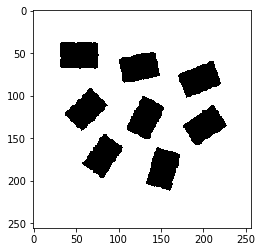

In [15]:
# applying threshold to function to images
x = np.where(filtered > 120, 255, 0).astype(int)
x_dip = dip.Image(x)
print("Kuwahara filtered image with threshold")
x_dip.Show()

This is a much better version of the noisy image. Aditionally, it be further improved with Smoothing and Sharpening operations.

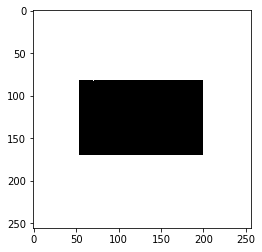

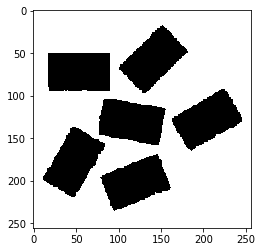

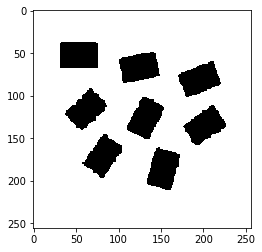

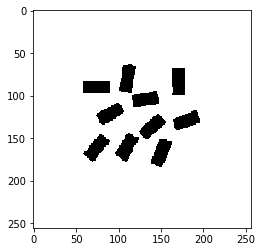

In [16]:
thresh = 120
structuring_element = dip.StructuringElement("rectangular")

rect_a_stats = []
rect_a_filter = []  # keeps the dip image objects
for rect in rect_a_data:
    # apply Kuwahara filter
    temp_img_a = dip.Kuwahara(rect, kernel=6, threshold=5)
    # apply thresholding function
    temp_img_a = dip.Image(np.where(temp_img_a > 120, 255, 0).astype(int))
    # apply opening/closing
    #temp_img_a = dip.MorphologicalSharpening(temp_img_a, structuring_element)
    #temp_img_a = dip.Erosion(temp_img_a, structuring_element)
    # append results
    rect_a_filter.append(temp_img_a)  
    rect_a_stats.append(area_and_perimeters(temp_img_a, thresh))
    dip.Show(temp_img_a)

In [17]:
print("Statistics for area and perimeter between original and denoised/filtered images")
print()
errors = []
for ind in range(len(rects_stats)):
    print(f"Original image \t| avg perimeter: {np.round(rects_stats[ind][0],3)} \t| perimeter std: {np.round(rects_stats[ind][1], 3)} \t| avg area: {np.round(rects_stats[ind][2],3)} \t| area std: {np.round(rects_stats[ind][3], 3)}")
    print(f"Edited image \t| avg perimeter: {np.round(rect_a_stats[ind][0],3)} \t| perimeter std: {np.round(rect_a_stats[ind][1], 3)} \t| avg area: {np.round(rect_a_stats[ind][2],3)} \t| area std: {np.round(rect_a_stats[ind][3], 3)}")
    print("-------------------------------------------------------------------------------------------------------------------")
    
    # calculate an error metric to benchmark our denoising
    error = np.abs(rects_stats[ind][0] - rect_a_stats[ind][0]) + np.abs(rects_stats[ind][1] - rect_a_stats[ind][1]) + np.abs(rects_stats[ind][2] - rect_a_stats[ind][2]) + np.abs(rects_stats[ind][3] - rect_a_stats[ind][3])
    errors.append(error)
print(f"Total error on all images: {np.round(np.sum(errors),3)}, (as sum of the perimeter and area diifference bertween our reconstruction and the denoised image)")

Statistics for area and perimeter between original and denoised/filtered images

Original image 	| avg perimeter: 457.498 	| perimeter std: 0.0 	| avg area: 12848.0 	| area std: 0.0
Edited image 	| avg perimeter: 458.656 	| perimeter std: 0.0 	| avg area: 12848.0 	| area std: 0.0
-------------------------------------------------------------------------------------------------------------------
Original image 	| avg perimeter: 233.811 	| perimeter std: 1.863 	| avg area: 3247.5 	| area std: 28.826
Edited image 	| avg perimeter: 237.08 	| perimeter std: 3.322 	| avg area: 3235.833 	| area std: 27.364
-------------------------------------------------------------------------------------------------------------------
Original image 	| avg perimeter: 147.581 	| perimeter std: 1.8 	| avg area: 1324.125 	| area std: 19.554
Edited image 	| avg perimeter: 147.08 	| perimeter std: 2.252 	| avg area: 1309.0 	| area std: 20.137
-----------------------------------------------------------------------

<br/>
<h4>Series B</h4>

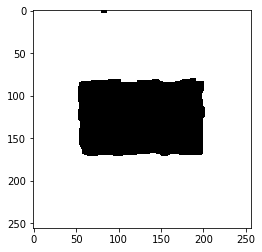

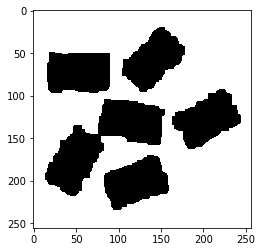

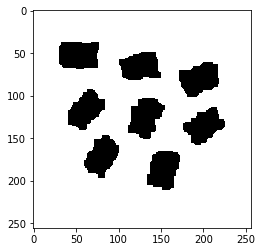

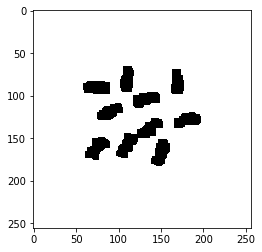

In [35]:
thresh = 120
structuring_element = dip.StructuringElement("rectangular")

rect_b_stats = []
rect_b_filter = []  # keeps the dip image objects
for rect in rect_b_data:
    
    temp_img_b = dip.Kuwahara(rect, kernel=5, threshold=5)
    # apply thresholding function
    temp_img_b = dip.Image(np.where(temp_img_b > 120, 255, 0).astype(int))

    temp_img_b = dip.Opening(temp_img_b, structuring_element)
    temp_img_b = dip.Closing(temp_img_b, structuring_element)
    #temp_img_b = dip.Kuwahara(temp_img_b, kernel=10, threshold=5)
    
    # append and display results
    rect_b_filter.append(temp_img_b)
    rect_b_stats.append(area_and_perimeters(temp_img_b, thresh))
    dip.Show(temp_img_b)

In [36]:
print("Statistics for area and perimeter between original and denoised/filtered images")
errors = []
for ind in range(len(rects_stats)):
    print(f"Original image \t | avg perimeter: {np.round(rects_stats[ind][0],3)} \t | perimeter std: {np.round(rects_stats[ind][1], 3)} \t | avg area: {np.round(rects_stats[ind][2],3)} \t | area std: {np.round(rects_stats[ind][3], 3)}")
    print(f"Edited image \t | avg perimeter: {np.round(rect_b_stats[ind][0],3)} \t | perimeter std: {np.round(rect_b_stats[ind][1], 3)} \t | avg area: {np.round(rect_b_stats[ind][2],3)} \t | area std: {np.round(rect_b_stats[ind][3], 3)}")
    print("-------------------------------------------------------------------------------------------------------------------")

    error = np.abs(rects_stats[ind][0] - rect_b_stats[ind][0]) + np.abs(rects_stats[ind][1] - rect_b_stats[ind][1]) + np.abs(rects_stats[ind][2] - rect_b_stats[ind][2]) + np.abs(rects_stats[ind][3] - rect_b_stats[ind][3])
    errors.append(error)
print(f"Total error on all images: {np.round(np.sum(errors),3)}, (as sum of the perimeter and area diifference bertween our reconstruction and the denoised image)")

Statistics for area and perimeter between original and denoised/filtered images
Original image 	 | avg perimeter: 457.498 	 | perimeter std: 0.0 	 | avg area: 12848.0 	 | area std: 0.0
Edited image 	 | avg perimeter: 465.828 	 | perimeter std: 0.0 	 | avg area: 12797.0 	 | area std: 0.0
-------------------------------------------------------------------------------------------------------------------
Original image 	 | avg perimeter: 233.811 	 | perimeter std: 1.863 	 | avg area: 3247.5 	 | area std: 28.826
Edited image 	 | avg perimeter: 287.818 	 | perimeter std: 96.384 	 | avg area: 3919.4 	 | area std: 1341.462
-------------------------------------------------------------------------------------------------------------------
Original image 	 | avg perimeter: 147.581 	 | perimeter std: 1.8 	 | avg area: 1324.125 	 | area std: 19.554
Edited image 	 | avg perimeter: 151.578 	 | perimeter std: 5.039 	 | avg area: 1325.375 	 | area std: 44.065
-------------------------------------------